In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
data = pd.read_csv('I:YesbankRM.csv')
data.head()

,C.S,C.H,C.B,C.L,P.S,P.H,P.B,P.L,C.B -C.L,C.B - P.B,C.B - P.L,C.L -P.B,C.L - P.L,P.B -P.L,P.S - P.H,P.S - P.B,P.S - P.L,P.H - P.B,P.H - P.L
0,178.4,182.40,168.85,165.45,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177.5,180.45,178.70,178.30,178.4,182.40,168.85,165.45,0.4,9.85,13.25,9.45,12.85,3.4,-4.00,9.55,12.95,13.55,16.95
2,175.4,178.30,174.70,172.50,177.5,180.45,178.70,178.30,2.2,-4.00,-3.60,-6.20,-5.80,0.4,-2.95,-1.20,-0.80,1.75,2.15
3,175.4,178.30,174.70,172.50,175.4,178.30,174.70,172.50,2.2,0.00,2.20,-2.20,0.00,2.2,-2.90,0.70,2.90,3.60,5.80
4,178.0,178.60,178.55,176.15,175.4,178.30,174.70,172.50,2.4,3.85,6.05,1.45,3.65,2.2,-2.90,0.70,2.90,3.60,5.80


Here this data collected manually with the help of technical indiactor(Moving average) for 5 minutes on Yesbank Stock.

C.S=Current Sell, C.H=Current High, C.B=Current Buy,C.L=Current Low, P.S=Privious Sell, P.H=Privious High, P.B=Privious Buy, P.L=Privious Low


In [124]:
data.isnull().sum()

C.S          0
C.H          0
C.B          0
C.L          0
P.S          1
P.H          1
P.B          1
P.L          1
C.B -C.L     0
C.B - P.B    1
C.B - P.L    1
C.L -P.B     1
C.L - P.L    1
P.B -P.L     1
P.S - P.H    1
P.S - P.B    1
P.S - P.L    1
P.H - P.B    1
P.H - P.L    1
dtype: int64

In [125]:
data=data.dropna()
data.shape

(80, 19)

In [126]:
data.drop(data.columns[0],axis=1, inplace=True)
data

,C.H,C.B,C.L,P.S,P.H,P.B,P.L,C.B -C.L,C.B - P.B,C.B - P.L,C.L -P.B,C.L - P.L,P.B -P.L,P.S - P.H,P.S - P.B,P.S - P.L,P.H - P.B,P.H - P.L
1,180.45,178.70,178.30,178.40,182.40,168.85,165.45,0.40,9.85,13.25,9.45,12.85,3.40,-4.00,9.55,12.95,13.55,16.95
2,178.30,174.70,172.50,177.50,180.45,178.70,178.30,2.20,-4.00,-3.60,-6.20,-5.80,0.40,-2.95,-1.20,-0.80,1.75,2.15
3,178.30,174.70,172.50,175.40,178.30,174.70,172.50,2.20,0.00,2.20,-2.20,0.00,2.20,-2.90,0.70,2.90,3.60,5.80
4,178.60,178.55,176.15,175.40,178.30,174.70,172.50,2.40,3.85,6.05,1.45,3.65,2.20,-2.90,0.70,2.90,3.60,5.80
5,178.50,178.05,177.50,178.00,178.60,178.55,176.15,0.55,-0.50,1.90,-1.05,1.35,2.40,-0.60,-0.55,1.85,0.05,2.45
6,178.30,174.70,172.50,177.45,178.50,178.05,177.50,2.20,-3.35,-2.80,-5.55,-5.00,0.55,-1.05,-0.60,-0.05,0.45,1.00
7,175.50,170.45,167.80,175.40,178.30,174.70,172.50,2.65,-4.25,-2.05,-6.90,-4.70,2.20,-2.90,0.70,2.90,3.60,5.80
8,168.70,165.00,162.05,170.10,175.50,170.45,167.80,2.95,-5.45,-2.80,-8.40,-5.75,2.65,-5.40,-0.35,2.30,5.05,7.70
9,169.50,163.30,160.10,166.00,168.70,165.00,162.05,3.20,-1.70,1.25,-4.90,-1.95,2.95,-2.70,1.00,3.95,3.70,6.65
10,186.95,164.25,164.80,165.60,169.50,163.30,160.10,-0.55,0.95,4.15,1.50,4.70,3.20,-3.90,2.30,5.50,6.20,9.40


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1 to 80
Data columns (total 18 columns):
C.H          80 non-null float64
C.B          80 non-null float64
C.L          80 non-null float64
P.S          80 non-null float64
P.H          80 non-null float64
P.B          80 non-null float64
P.L          80 non-null float64
C.B -C.L     80 non-null float64
C.B - P.B    80 non-null float64
C.B - P.L    80 non-null float64
C.L -P.B     80 non-null float64
C.L - P.L    80 non-null float64
P.B -P.L     80 non-null float64
P.S - P.H    80 non-null float64
P.S - P.B    80 non-null float64
P.S - P.L    80 non-null float64
P.H - P.B    80 non-null float64
P.H - P.L    80 non-null float64
dtypes: float64(18)
memory usage: 11.9 KB


In [128]:
y=labels = data['C.H']
y.head()

1    180.45
2    178.30
3    178.30
4    178.60
5    178.50
Name: C.H, dtype: float64

In [129]:
x=features= data.drop('C.H', axis = 1)
x.head()

,C.B,C.L,P.S,P.H,P.B,P.L,C.B -C.L,C.B - P.B,C.B - P.L,C.L -P.B,C.L - P.L,P.B -P.L,P.S - P.H,P.S - P.B,P.S - P.L,P.H - P.B,P.H - P.L
1,178.70,178.30,178.4,182.40,168.85,165.45,0.40,9.85,13.25,9.45,12.85,3.4,-4.00,9.55,12.95,13.55,16.95
2,174.70,172.50,177.5,180.45,178.70,178.30,2.20,-4.00,-3.60,-6.20,-5.80,0.4,-2.95,-1.20,-0.80,1.75,2.15
3,174.70,172.50,175.4,178.30,174.70,172.50,2.20,0.00,2.20,-2.20,0.00,2.2,-2.90,0.70,2.90,3.60,5.80
4,178.55,176.15,175.4,178.30,174.70,172.50,2.40,3.85,6.05,1.45,3.65,2.2,-2.90,0.70,2.90,3.60,5.80
5,178.05,177.50,178.0,178.60,178.55,176.15,0.55,-0.50,1.90,-1.05,1.35,2.4,-0.60,-0.55,1.85,0.05,2.45


In [130]:
data_list = list(data.columns)
data_list

['C.H',
 'C.B',
 'C.L',
 'P.S',
 'P.H',
 'P.B',
 'P.L',
 'C.B -C.L',
 'C.B - P.B',
 'C.B - P.L',
 'C.L -P.B',
 'C.L - P.L',
 'P.B -P.L',
 'P.S - P.H',
 'P.S - P.B',
 'P.S - P.L',
 'P.H - P.B',
 'P.H - P.L']

In [131]:
features = np.array(features)
features

array([[178.7 , 178.3 , 178.4 , ...,  12.95,  13.55,  16.95],
       [174.7 , 172.5 , 177.5 , ...,  -0.8 ,   1.75,   2.15],
       [174.7 , 172.5 , 175.4 , ...,   2.9 ,   3.6 ,   5.8 ],
       ...,
       [172.4 , 170.5 , 176.3 , ...,   1.3 ,   1.  ,   2.85],
       [173.  , 172.6 , 173.4 , ...,   2.9 ,   2.5 ,   4.4 ],
       [174.65, 173.65, 174.55, ...,   1.95,   3.2 ,   3.6 ]])

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [134]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (60, 17)
Training Labels Shape: (60,)
Testing Features Shape: (20, 17)
Testing Labels Shape: (20,)


In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [137]:
rf.fit(train_features, train_labels);

In [138]:
predictions = rf.predict(test_features)
predictions

array([185.221 , 182.8565, 184.513 , 185.2355, 184.8265, 185.1685,
       186.3615, 182.437 , 182.396 , 188.5935, 205.4885, 184.757 ,
       196.6775, 189.3685, 190.459 , 188.8385, 178.3095, 206.416 ,
       202.1465, 200.0845])

In [139]:
errors = abs(predictions - test_labels)
errors

31    3.1210
1     2.4065
23    0.4130
32    2.5855
19    0.6235
29    1.3685
11    7.1385
71    1.7370
5     3.8960
13    9.8435
50    0.4885
34    2.2430
68    2.3775
36    3.3685
69    6.0590
46    9.1615
74    0.6595
62    0.5840
56    2.1465
41    8.6345
Name: C.H, dtype: float64

In [140]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.44 degrees.


In [141]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 98.16 %.


In [142]:
fm=rf.feature_importances_
fm

array([0.27523722, 0.3104437 , 0.05516429, 0.05599057, 0.16236615,
       0.05071423, 0.01092085, 0.00488372, 0.00399931, 0.00363213,
       0.00606879, 0.00487174, 0.00543207, 0.02077978, 0.0032561 ,
       0.0194111 , 0.00682825])

In [143]:
%matplotlib inline

<function matplotlib.pyplot.show>

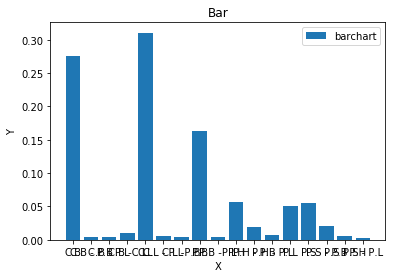

In [144]:
x=["C.B","C.L","P.S","P.H","P.B","P.L","C.B -C.L","C.B - P.B","C.B - P.L","C.L -P.B","C.L - P.L","P.B -P.L","P.S - P.H","P.S - P.B","P.S - P.L","P.H - P.B","P.H - P.L"]

y=[ 0.27523722,  0.3104437 ,  0.05516429,  0.05599057,  0.16236615,
        0.05071423,  0.01092085,  0.00488372,  0.00399931,  0.00363213,
        0.00606879,  0.00487174,  0.00543207,  0.02077978,  0.0032561 ,
        0.0194111 ,  0.00682825]
plt.bar(x,y,label="barchart")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bar")
plt.legend()
plt.show

In [145]:
data = pd.read_csv('I:RDC.csv')
vs=data
vs

,C.B,C.L,P.S,P.H,P.B,P.L,C.B -C.L,C.B - P.B,C.B - P.L,C.L -P.B,C.L - P.L,P.B -P.L,P.S - P.H,P.S - P.B,P.S - P.L,P.H - P.B,P.H - P.L
0,175.9,173.1,176.4,177.65,175.8,175.25,2.8,0.1,0.65,-2.7,-2.15,0.55,-1.25,0.6,1.15,1.85,2.4


In [146]:
rf.predict(vs)

array([180.345])

It means that our current High value for Yesbank will be 180.345